In [11]:
import pandas as pd

In [12]:
df_data = pd.read_csv("gym-10000.csv")

In [13]:
df_data

,Index,Customer ID,First Name,Last Name,Full Name,Country,Phone 2,Email,Date
0,1,EB54EF11,Heather,Callahan,Heather Callahan,Norway,9151121727,urangel@espinoza-francis.net,2020-01-01
1,2,10dAcafE,Kristina,Ferrell,Kristina Ferrell,Andorra,9091727124,xreese@hall-donovan.com,2020-01-01
2,3,67DAB15E,Briana,Andersen,Briana Andersen,Nepal,9671351918,haleybraun@blevins-sexton.com,2020-01-01
3,4,6d350C5E,Patty,Ponce,Patty Ponce,Northern Mariana Islands,9961897767,hohailey@anthony.com,2020-01-01
4,5,5820deAd,Kathleen,Mccormick,Kathleen Mccormick,Macao,9520512979,alvaradojesse@rangel-shields.com,2020-01-01
...,...,...,...,...,...,...,...,...,...
9995,9996,DD0caa06,Meghan,Cline,Meghan Cline,Cote d'Ivoire,9013496921,nicolasandrade@bates.info,2022-05-27
9996,9997,C1C62ff9,Jeremiah,Pena,Jeremiah Pena,Namibia,9012953245,tracy68@wade.com,2022-05-28
9997,9998,2EfAa6Fe,Peggy,Key,Peggy Key,United States Virgin Islands,9602934590,mclaughlinjulia@barnett-dorsey.com,2022-05-29
9998,9999,5dB06C3F,Evan,Humphrey,Evan Humphrey,Niger,9016399552,velazquezjessica@villegas-wilcox.com,2022-05-29


In [14]:
df_data.head()

,Index,Customer ID,First Name,Last Name,Full Name,Country,Phone 2,Email,Date
0,1,EB54EF11,Heather,Callahan,Heather Callahan,Norway,9151121727,urangel@espinoza-francis.net,2020-01-01
1,2,10dAcafE,Kristina,Ferrell,Kristina Ferrell,Andorra,9091727124,xreese@hall-donovan.com,2020-01-01
2,3,67DAB15E,Briana,Andersen,Briana Andersen,Nepal,9671351918,haleybraun@blevins-sexton.com,2020-01-01
3,4,6d350C5E,Patty,Ponce,Patty Ponce,Northern Mariana Islands,9961897767,hohailey@anthony.com,2020-01-01
4,5,5820deAd,Kathleen,Mccormick,Kathleen Mccormick,Macao,9520512979,alvaradojesse@rangel-shields.com,2020-01-01


In [15]:
df_data['Date'] = pd.to_datetime(df_data['Date'])

In [40]:
import matplotlib.pyplot as plt

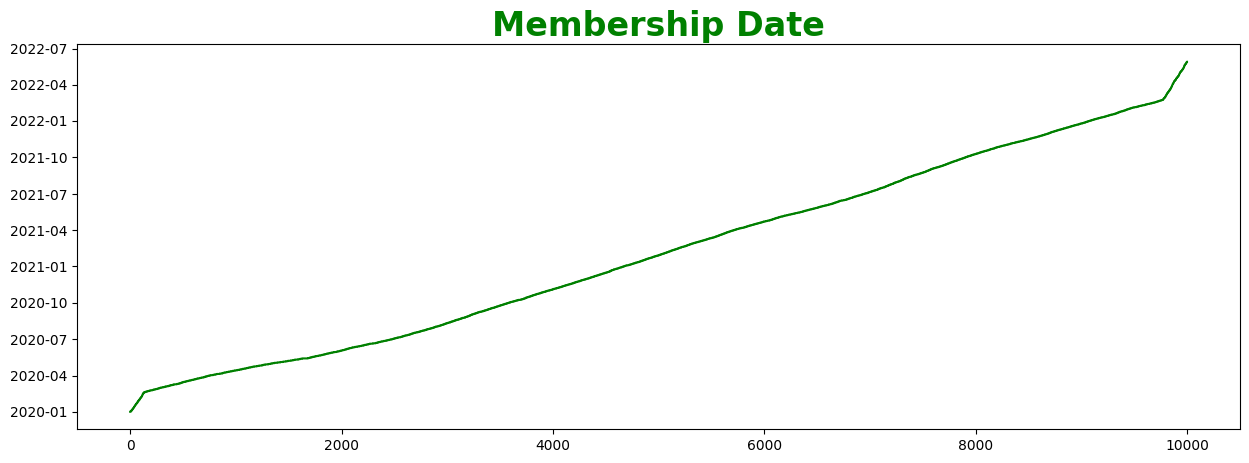

In [41]:
df_data["Date"].plot(figsize=(15,5),color="green")
plt.title("Membership Date", fontweight="bold", size=24, color="green")
plt.show()

In [42]:
from pmdarima import auto_arima

In [43]:
auto_arima(df_data["Date"],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:               SARIMAX(0, 2, 0)   Log Likelihood             -326241.320
Date:                Thu, 18 May 2023   AIC                         652484.639
Time:                        00:54:27   BIC                         652491.849
Sample:                             0   HQIC                        652487.080
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.288e+27   1.09e+25    117.886      0.000    1.27e+27    1.31e+27
===================================================================================
Ljung-Box (L1) (Q):                2611.55   Jarque-Bera (JB):              5273.11
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
# data partitioning

In [45]:
n=len(df_data)
n

10000

In [46]:
# validation set

In [58]:
start_index = n-923
start_index

9077

In [59]:
df_training = df_data.iloc[:start_index]
df_training

,Index,Customer ID,First Name,Last Name,Full Name,Country,Phone 2,Email,Date
0,1,EB54EF11,Heather,Callahan,Heather Callahan,Norway,9151121727,urangel@espinoza-francis.net,2020-01-01
1,2,10dAcafE,Kristina,Ferrell,Kristina Ferrell,Andorra,9091727124,xreese@hall-donovan.com,2020-01-01
2,3,67DAB15E,Briana,Andersen,Briana Andersen,Nepal,9671351918,haleybraun@blevins-sexton.com,2020-01-01
3,4,6d350C5E,Patty,Ponce,Patty Ponce,Northern Mariana Islands,9961897767,hohailey@anthony.com,2020-01-01
4,5,5820deAd,Kathleen,Mccormick,Kathleen Mccormick,Macao,9520512979,alvaradojesse@rangel-shields.com,2020-01-01
...,...,...,...,...,...,...,...,...,...
9072,9069,BBC2fdC2,Krista,Frey,Krista Frey,Chile,9218936299,ray89@pitts.com,2021-12-31
9073,9068,D3BA2462,Michelle,Nguyen,Michelle Nguyen,Jersey,9042283693,santiagotheodore@dickerson-hardin.com,2021-12-31
9074,9067,39C7aeAc,Adrian,Shelton,Adrian Shelton,Italy,9095668851,uvillarreal@davidson-colon.org,2021-12-31
9075,9066,aB27Bc7D,Summer,Compton,Summer Compton,French Guiana,9013585955,kent72@wagner-daugherty.com,2021-12-31


In [60]:
df_test = df_data.iloc[start_index:]
df_test

,Index,Customer ID,First Name,Last Name,Full Name,Country,Phone 2,Email,Date
9077,9086,bEA3eCe8,Barry,Parks,Barry Parks,Canada,9594468508,theresagonzalez@roberson-flores.org,2022-01-01
9078,9090,Aad7e80a,Tami,Henson,Tami Henson,Ecuador,9015675624,suedavies@stafford.info,2022-01-01
9079,9089,bfc3B455,Sophia,Schultz,Sophia Schultz,Afghanistan,9705578403,lucasweeks@carter.info,2022-01-01
9080,9088,b0bFc35A,Mark,Bennett,Mark Bennett,New Zealand,9015688429,dmcguire@randall-mccarty.biz,2022-01-01
9081,9087,F3aA4ABD,Vicki,Brennan,Vicki Brennan,Ecuador,9775457854,mccarthyisabel@madden.com,2022-01-01
...,...,...,...,...,...,...,...,...,...
9995,9996,DD0caa06,Meghan,Cline,Meghan Cline,Cote d'Ivoire,9013496921,nicolasandrade@bates.info,2022-05-27
9996,9997,C1C62ff9,Jeremiah,Pena,Jeremiah Pena,Namibia,9012953245,tracy68@wade.com,2022-05-28
9997,9999,5dB06C3F,Evan,Humphrey,Evan Humphrey,Niger,9016399552,velazquezjessica@villegas-wilcox.com,2022-05-29
9998,9998,2EfAa6Fe,Peggy,Key,Peggy Key,United States Virgin Islands,9602934590,mclaughlinjulia@barnett-dorsey.com,2022-05-29


In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [72]:
model = SARIMAX(df_training['Date'],order=(0,2,0))
results = model.fit()
results.summary()

TypeError: The DType <class 'numpy.dtype[timedelta64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[timedelta64]'>, <class 'numpy.dtype[float64]'>)